# CoinMarketCap: Exploratory Data Analysis



### Import and instantiate CoinMarketcap
This object represents the data found at https://coinmarketcap.com.

In [1]:
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cmk = coinmarketcap.CoinMarketcap()

### Get coin obects.
Coins are ranked by marketcap. The first one is probably bitcoin from https://coinmarketcap.com/currencies/bitcoin.

In [3]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)
coin_data.head()

,github_url,marketcap,name,price,symbol,timestamp,url,volume
0,https://github.com/bitcoin/,189536000000,Bitcoin,11231.80,BTC,None,http://coinmarketcap.com/currencies/bitcoin/,9926540000
1,https://github.com/ethereum,92206500000,Ethereum,943.57,ETH,None,http://coinmarketcap.com/currencies/ethereum/,2545260000
2,https://github.com/ripple,44648100000,Ripple,1.14,XRP,None,http://coinmarketcap.com/currencies/ripple/,806673000
3,https://github.com/bitcoincashorg/,26199800000,Bitcoin Cash,1543.27,BCH,None,http://coinmarketcap.com/currencies/bitcoin-cash/,820947000
4,https://github.com/litecoin-project/litecoin,12335100000,Litecoin,223.09,LTC,None,http://coinmarketcap.com/currencies/litecoin/,1739670000


### Plot a Barchart of Coins by Marketcap

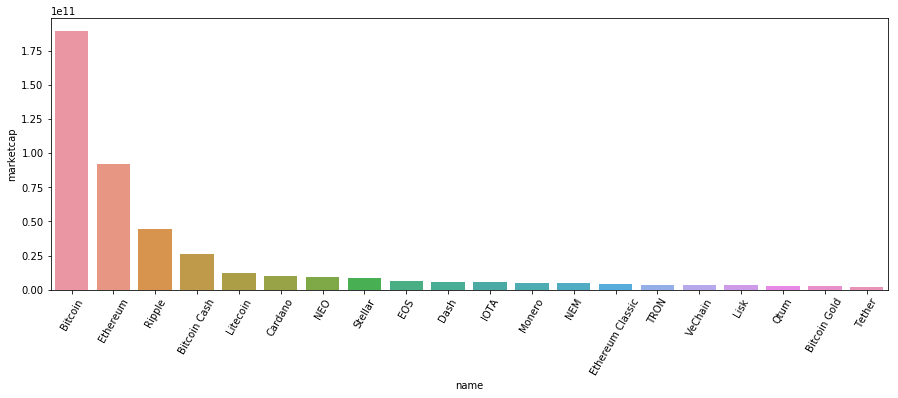

In [4]:
plt.figure(figsize=(15,5))
g = sns.barplot(data=coin_data[:20], x='name', y='marketcap')
g = g.set_xticklabels(labels=coin_data['name'], rotation=60)


### Plot a Pie Chart of Coins by Marketcap

In [5]:
# Aggregate smaller values into 'other' category
num_coins = 5
data = sorted(list(zip(coin_data['marketcap'].values, coin_data['name'].values)), reverse=True)
other = sum(d[0] for d in data[num_coins:])
data = data[:num_coins] + [(other, 'other')]
[sizes, labels] = zip(*data)

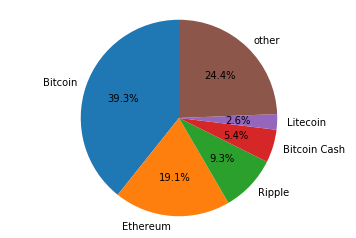

In [6]:
# Plot the chart
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Get GitHub Page for Bitcoin

In [9]:
bitcoin = coins[0]
btc_github = bitcoin.github()
btc_repo = btc_github.pinned_repos()[0]
btc_repo

{'name': 'bitcoin-repo', 'url': 'https://github.com/bitcoin/bitcoin', 'description': 'Bitcoin Core integration/staging tree', 'language': 'C++', 'stars': 28478, 'forks': 16882, 'watch': 3038}

#### Plot a coins GitHub Stars by Price

#### Explore cmk Usage

In [ ]:
coin_data = cmk.all_coin_data()

In [ ]:
#features (TODO):
#    timestamp
#    github_stars

coin_data.head()


In [ ]:
coins = cmk.coins()

In [ ]:
bitcoin = coins[0]

In [ ]:
bitcoin

In [ ]:
bitcoin = cmk.coin(bitcoin)

In [ ]:
bitcoin

In [ ]:
bitcoin.get_history()

In [ ]:
cmk.coin_names()